In [170]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

**Importing the dataset**

In [172]:
df=pd.read_csv('/content/drive/MyDrive/Task7/Assignment11_to_16/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Data Preprocessing**

In [174]:
#Find Missing Values & Replace

df.isnull().sum() 
print('There is no Null')

flag=False
for elem in ['Age', 'EstimatedSalary']:
  val=df[df[elem].values==0]
  if len(val)>0:
    print(elem,len(val))
    flag=True
if flag==False:
  print('There is no Zero')     

There is no Null
There is no Zero


In [175]:
#Drop Duplicate Records
 
df=df.drop_duplicates() 
print(df.shape)
print('There is no Duplicates')

(400, 5)
There is no Duplicates


In [176]:
# Encoding Gender Column
# 'Male'- 1,'Female' - 0
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [177]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

**Feature Scaling**

In [179]:
mmscale=MinMaxScaler()
x_train=pd.DataFrame(mmscale.fit_transform(x_train))
x_test=pd.DataFrame(mmscale.fit_transform(x_test))

**Fitting K-NN to the Training set**

In [180]:
param_grid = {"n_neighbors": range(1, 18)}
knn = KNeighborsClassifier()
# Perform grid search with cross-validation
gscv = GridSearchCV(knn, param_grid, cv=5)
gscv.fit(x_train, y_train)
best_val=(gscv.best_params_)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

Best params: {'n_neighbors': 13}
Best cross-validation score: 0.909375


In [181]:
kmodel=KNeighborsClassifier(n_neighbors=best_val['n_neighbors'])
kmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

**Predicting the Test set results**

In [182]:
y_pred=kmodel.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

**Making the Confusion Matrix**

In [183]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[48,  4],
       [ 2, 26]])

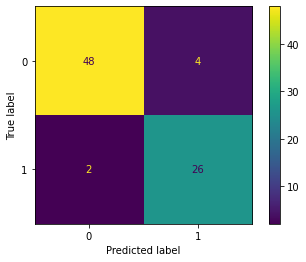

In [184]:
cnf1=ConfusionMatrixDisplay(cnf)
cnf1.plot()

**Classification Report**

In [185]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80

